<h3>Importar Libreria<h3>

In [55]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<h3>Cargar Banco de Datos<h3>

In [56]:
df = pd.read_csv('./data/diabetes_data.csv', sep=';')

In [57]:
df.head(3)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [59]:
#Traducir los nombres de las columnas
def cambiar_nombres_columnas(df):
    nombres = {
        'age': 'edad',
        'gender': 'genero',
        'polyuria': 'poliuria',
        'polydipsia': 'polidipsia',
        'sudden_weight_loss': 'perdida_subita_de_peso',
        'weakness': 'debilidad',
        'polyphagia': 'polifagia',
        'genital_thrush': 'candidiasis_genital',
        'visual_blurring': 'visión_borrosa',
        'itching': 'picazon',
        'irritability': 'irritabilidad',
        'delayed_healing': 'curacion_lenta',
        'partial_paresis': 'paresia_parcial',
        'muscle_stiffness': 'rigidez_muscular',
        'alopecia': 'alopecia',
        'obesity': 'obesidad',
        'class': 'clase'
    }
    df = df.rename(columns=nombres)
    return df


In [60]:
df = cambiar_nombres_columnas(df)

In [61]:
#Nuevos Nombres de Columnas

df.columns

Index(['edad', 'genero', 'poliuria', 'polidipsia', 'perdida_subita_de_peso',
       'debilidad', 'polifagia', 'candidiasis_genital', 'visión_borrosa',
       'picazon', 'irritabilidad', 'curacion_lenta', 'paresia_parcial',
       'rigidez_muscular', 'alopecia', 'obesidad', 'clase'],
      dtype='object')

Text(0.5, 0, 'Edad')

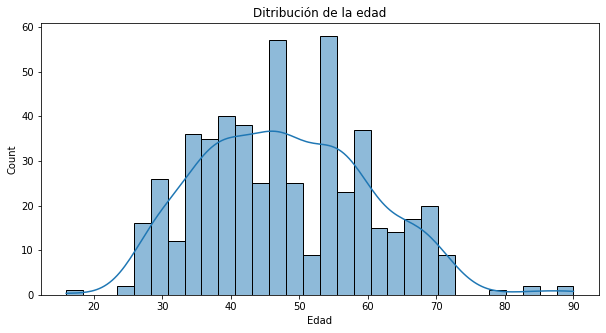

In [62]:
#Distribución de la edad 
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='edad' , bins=30 , kde=True)
plt.title('Ditribución de la edad')
plt.xlabel('Edad')

In [63]:
#Escalado o Normalización de los datos
from sklearn.preprocessing import MinMaxScaler

def escalar_edad(df):
    scaler = MinMaxScaler()
    edad_scaled = scaler.fit_transform(df[['edad']])
    df['edad'] = edad_scaled
    return df

In [64]:
df = escalar_edad(df)

Text(0.5, 0, 'Edad')

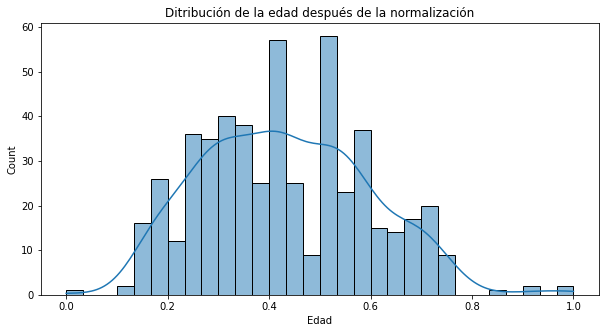

In [65]:
#Distribución de la edad después de la normalización
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='edad' , bins=30 , kde=True)
plt.title('Ditribución de la edad después de la normalización')
plt.xlabel('Edad')

In [66]:

from sklearn.preprocessing import OneHotEncoder

def renombrar_genero(df):
    # Definir diccionario para la traducción de los valores
    genero_dict = {'Male': 'Hombre', 'Female': 'Mujer'}

    # Aplicar la traducción en la variable 'genero'
    df['genero'] = df['genero'].apply(lambda x: genero_dict[x])

    return df

def one_hot_encoder(df):
    encoder = OneHotEncoder(handle_unknown='ignore')
    genero_encoded = encoder.fit_transform(df[['genero']])
    genero_encoded_df = pd.DataFrame(genero_encoded.toarray(), columns=encoder.get_feature_names(['genero']))
    df = pd.concat([df, genero_encoded_df], axis=1)
    df = df.drop(['genero'], axis=1)
    return df

In [67]:
df = renombrar_genero(df)
df = one_hot_encoder(df)
df.head()

,edad,poliuria,polidipsia,perdida_subita_de_peso,debilidad,polifagia,candidiasis_genital,visión_borrosa,picazon,irritabilidad,curacion_lenta,paresia_parcial,rigidez_muscular,alopecia,obesidad,clase,genero_Hombre,genero_Mujer
0,0.324324,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1.0,0.0
1,0.567568,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1.0,0.0
2,0.337838,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,1.0,0.0
3,0.391892,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,1.0,0.0
4,0.594595,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1.0,0.0


In [70]:
#Analisis Exploratorio de Datos
import seaborn as sns
import matplotlib.pyplot as plt

def exploratorio_datos(df, target_col):
    # resumen estadístico
    print(df.describe())
    
    # gráfico de correlación
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Gráfico de correlación')
    plt.show()
    
    # distribución de la variable objetivo
    sns.countplot(x=target_col, data=df)
    plt.title('Distribución de la variable objetivo')
    plt.show()
    
    # gráficos de distribución de las variables numéricas
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        sns.displot(df, x=col)
        plt.title(f'Distribución de {col}')
        plt.show()
    
    # gráficos de caja de las variables numéricas por variable objetivo
    for col in num_cols:
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f'Boxplot de {col} por {target_col}')
        plt.show()
    
    # gráfico de barras de las variables categóricas por variable objetivo
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        sns.countplot(x=col, hue=target_col, data=df)
        plt.title(f'Gráfico de barras de {col} por {target_col}')
        plt.show()

             edad    poliuria  polidipsia  perdida_subita_de_peso   debilidad  \
count  520.000000  520.000000  520.000000              520.000000  520.000000   
mean     0.432822    0.496154    0.448077                0.417308    0.586538   
std      0.164209    0.500467    0.497776                0.493589    0.492928   
min      0.000000    0.000000    0.000000                0.000000    0.000000   
25%      0.310811    0.000000    0.000000                0.000000    0.000000   
50%      0.425676    0.000000    0.000000                0.000000    1.000000   
75%      0.554054    1.000000    1.000000                1.000000    1.000000   
max      1.000000    1.000000    1.000000                1.000000    1.000000   

        polifagia  candidiasis_genital  visión_borrosa     picazon  \
count  520.000000           520.000000      520.000000  520.000000   
mean     0.455769             0.223077        0.448077    0.486538   
std      0.498519             0.416710        0.497776    0.

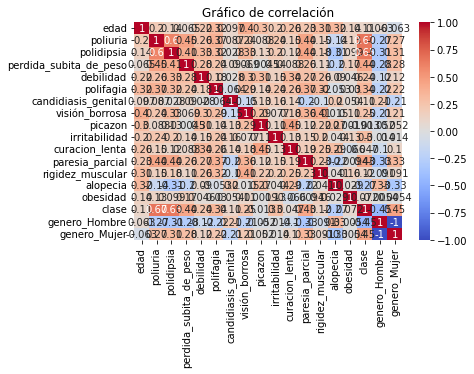

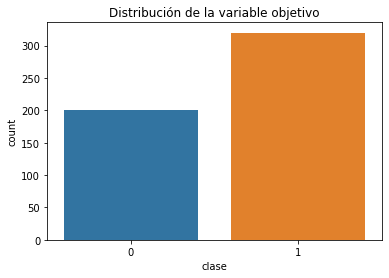

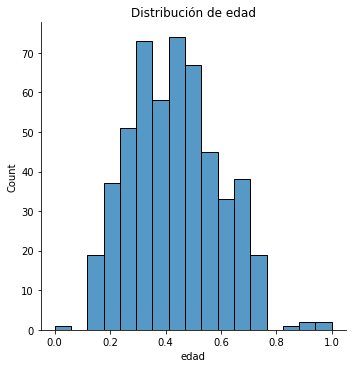

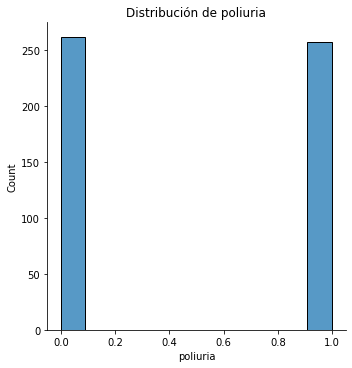

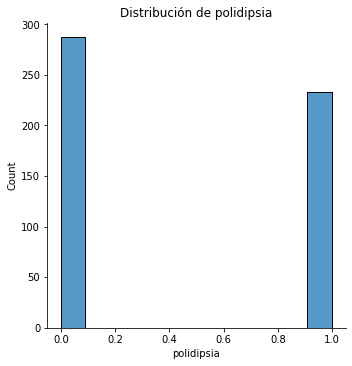

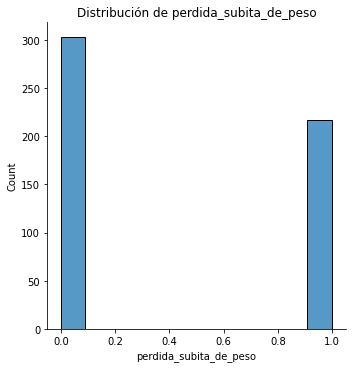

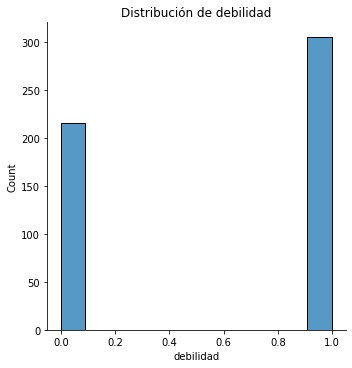

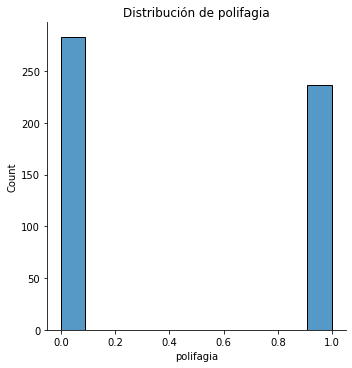

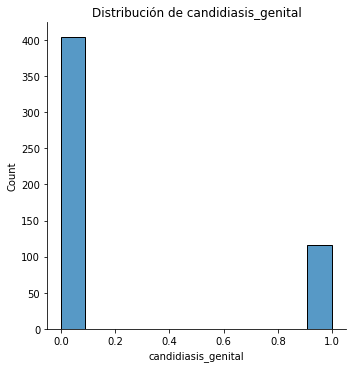

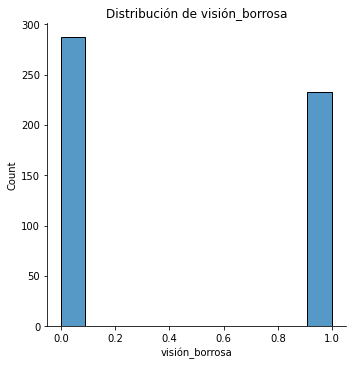

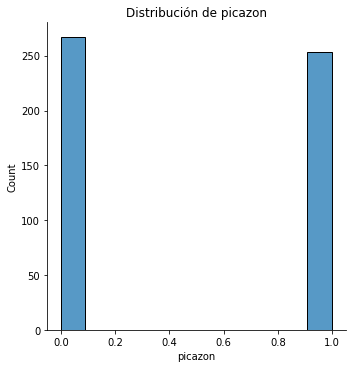

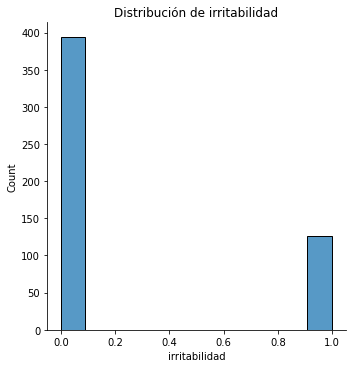

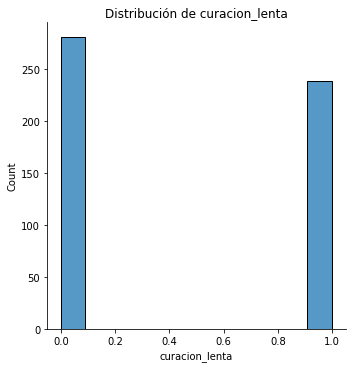

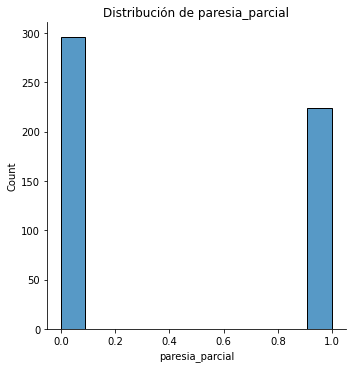

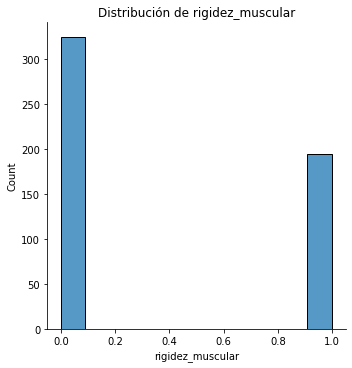

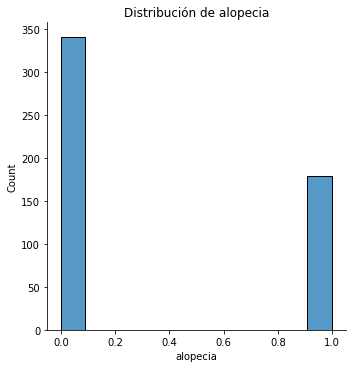

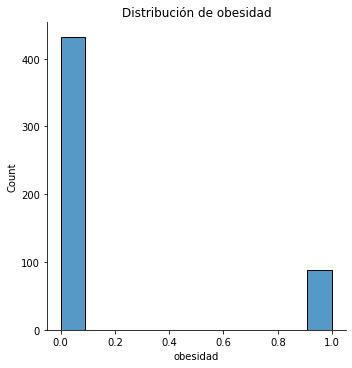

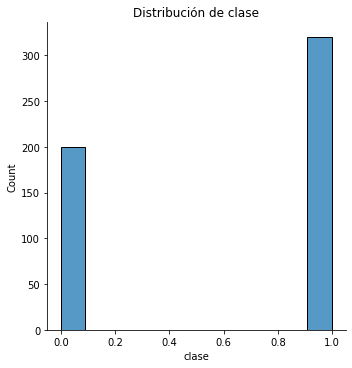

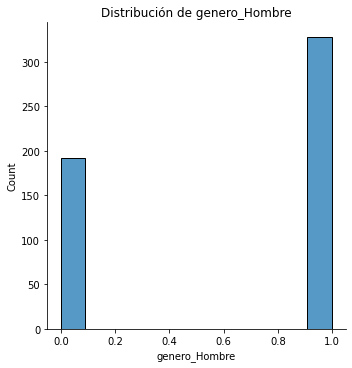

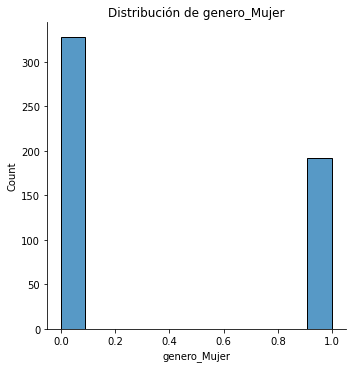

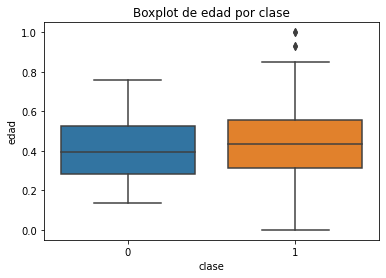

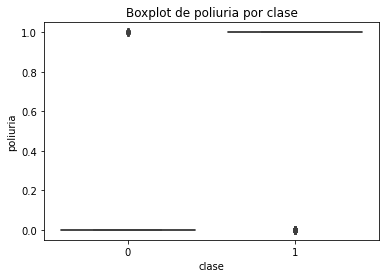

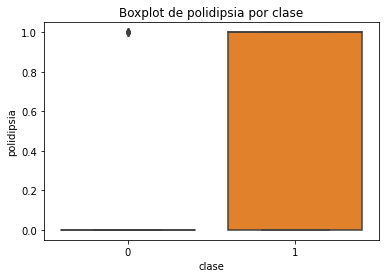

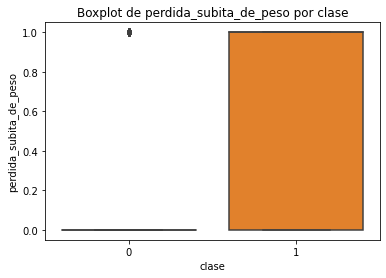

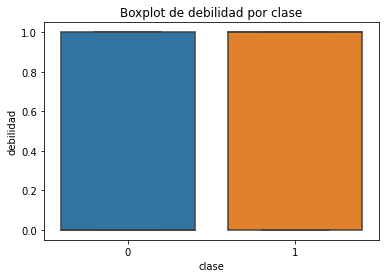

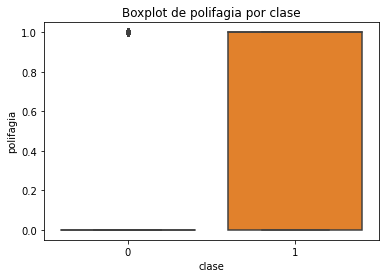

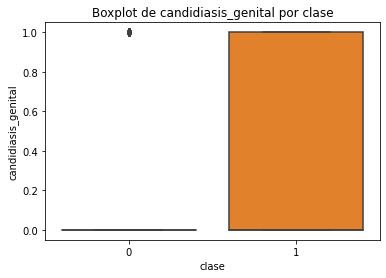

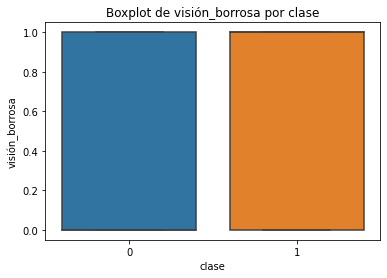

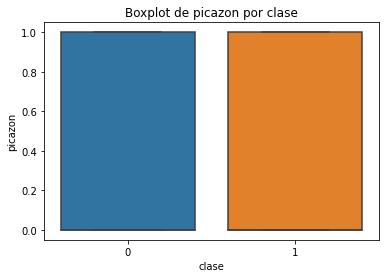

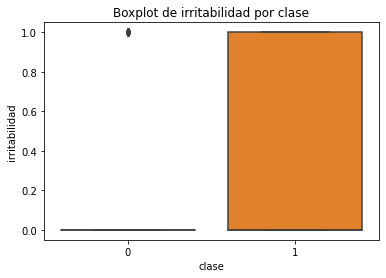

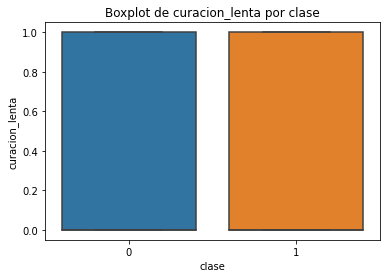

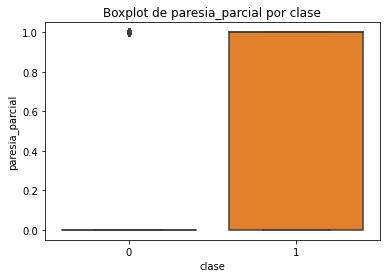

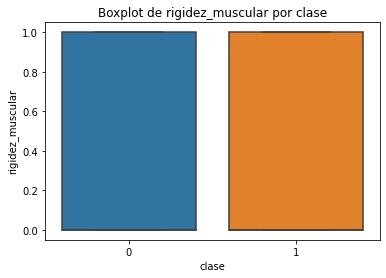

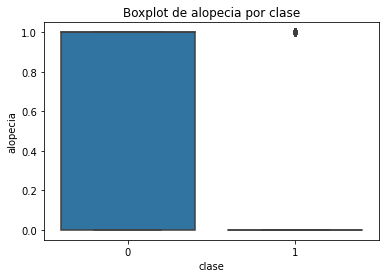

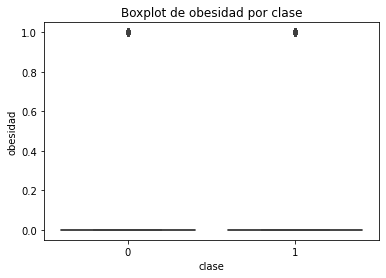

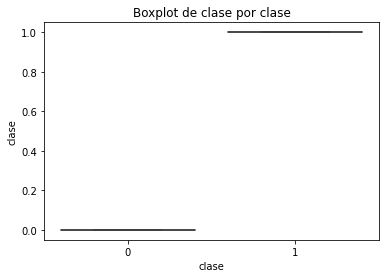

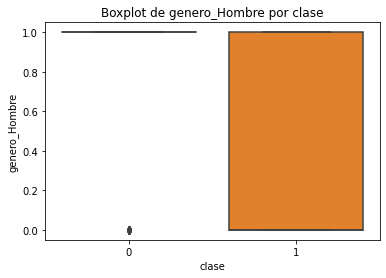

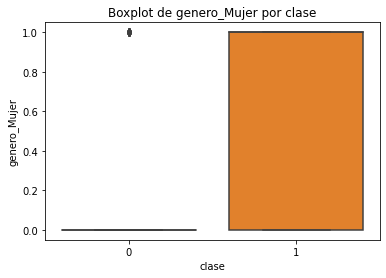

In [71]:
exploratorio_datos(df, 'clase')

In [68]:
#Identificación de la variable objetivo y separación de los conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

def separar_train_test(df, test_size=0.2, random_state=42):
    X = df.drop(['clase'], axis=1)
    y = df['clase']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test


In [104]:
X_train, X_test, y_train, y_test = separar_train_test(df)

In [143]:
#Función de Entrrenamiento y Evaluación de Modelos
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

def entrenar_evaluar_modelos(X_train, X_test, y_train, y_test):
    """
    Función que entrena y evalúa distintos modelos de clasificación, incluyendo al menos 12 modelos,
    utilizando los datos de entrenamiento y prueba proporcionados. Se muestra el tiempo de entrenamiento,
    las métricas de clasificación y una gráfica de la matriz de confusión para cada modelo. Además, se incluye
    la validación cruzada.

    Args:
        X_train (pandas.DataFrame): Datos de entrenamiento.
        X_test (pandas.DataFrame): Datos de prueba.
        y_train (pandas.Series): Etiquetas de entrenamiento.
        y_test (pandas.Series): Etiquetas de prueba.
    """
    #Modelos
    models = [
        ('Regresión Logística', LogisticRegression()),
        ('K-Vecinos más Cercanos', KNeighborsClassifier()),
        ('Árbol de decisión', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Support Vector Machines', SVC()),
        ('Gaussian Naive Bayes', GaussianNB()),
        ('Multinomial Naive Bayes', MultinomialNB()),
        ('Red Neuronal Artificial', MLPClassifier()),
        ('Perceptrón Multicapa', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('XGBoost', XGBClassifier()),
        ('CatBoost', CatBoostClassifier(verbose=False)),
        ]
    
    #Se crea diccionario para guardar resultados
    resultados = {}

    for name, model in models:
        inicio = time.time()
        model.fit(X_train, y_train)
        tiempo_entrenamiento = time.time() - inicio
        print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.2f} segundos")
        # Predicciones
        y_pred = model.predict(X_test)

        # Métricas de clasificación
        print(f"Modelo: {name}\n{'-'*50}")
        print("Métricas de clasificación:")
        print(classification_report(y_test, y_pred))
        
        
        #Guardar resultados
        reporte_clasificacion = classification_report(y_test, y_pred)
        matriz_confusion = confusion_matrix(y_test, y_pred)
        cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        #Para las variables precision, recall y f1 se utiliza el parámetro pos_label=1 para que se calcule para la clase 1
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        resultados[name] = {'modelo': model, 'matriz_confusion': matriz_confusion, 
                          'cross_val_scores': cross_val_scores, 'precision': precision, 'recall': recall, 'f1': f1, 
                          'tiempo_entrenamiento': tiempo_entrenamiento}

        # Matriz de confusión
        conf_matrix = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots()
        plt.imshow(conf_matrix, cmap=plt.cm.Blues)
        plt.colorbar()
        ax.set_xticks(np.arange(len(np.unique(y_test))))
        ax.set_yticks(np.arange(len(np.unique(y_test))))
        ax.set_xticklabels(np.unique(y_test))
        ax.set_yticklabels(np.unique(y_test))
        plt.xlabel('Predicciones')
        plt.ylabel('Valores verdaderos')
        plt.title(f"Matriz de confusión - {name}")
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
        plt.show()

        # Validación cruzada
        scores = cross_val_score(model, X_train, y_train, cv=5)
        print("Validación cruzada:")
        print(f"Puntajes: {scores}")
        print(f"Media: {scores.mean():.3f}")
        print(f"Desviación estándar: {scores.std():.3f}")
        print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.3f}s\n")
        
    return resultados

In [158]:
X_train.columns

Index(['edad', 'poliuria', 'polidipsia', 'perdida_subita_de_peso', 'debilidad',
       'polifagia', 'candidiasis_genital', 'visión_borrosa', 'picazon',
       'irritabilidad', 'curacion_lenta', 'paresia_parcial',
       'rigidez_muscular', 'alopecia', 'obesidad', 'genero_Hombre',
       'genero_Mujer'],
      dtype='object')

Tiempo de entrenamiento: 0.02 segundos
Modelo: Regresión Logística
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



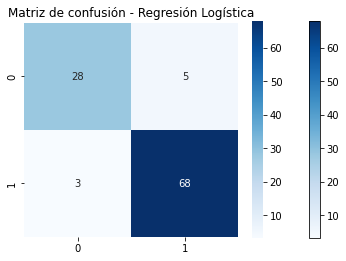

Validación cruzada:
Puntajes: [0.94047619 0.91566265 0.92771084 0.90361446 0.91566265]
Media: 0.921
Desviación estándar: 0.013
Tiempo de entrenamiento: 0.024s

Tiempo de entrenamiento: 0.00 segundos
Modelo: K-Vecinos más Cercanos
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.96      0.92      0.94        71

    accuracy                           0.91       104
   macro avg       0.89      0.91      0.90       104
weighted avg       0.92      0.91      0.91       104



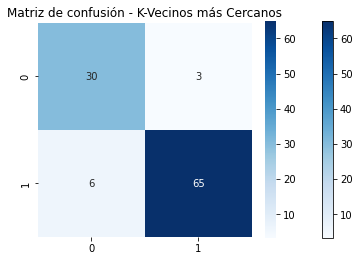

Validación cruzada:
Puntajes: [0.89285714 0.93975904 0.91566265 0.92771084 0.93975904]
Media: 0.923
Desviación estándar: 0.018
Tiempo de entrenamiento: 0.002s

Tiempo de entrenamiento: 0.00 segundos
Modelo: Árbol de decisión
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



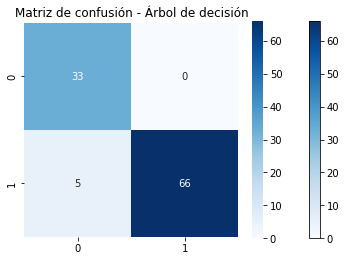

Validación cruzada:
Puntajes: [0.95238095 0.91566265 0.98795181 0.93975904 0.98795181]
Media: 0.957
Desviación estándar: 0.028
Tiempo de entrenamiento: 0.003s

Tiempo de entrenamiento: 0.11 segundos
Modelo: Random Forest
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



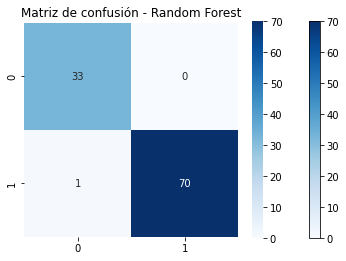

Validación cruzada:
Puntajes: [0.96428571 0.96385542 0.95180723 0.96385542 0.98795181]
Media: 0.966
Desviación estándar: 0.012
Tiempo de entrenamiento: 0.114s

Tiempo de entrenamiento: 0.00 segundos
Modelo: Support Vector Machines
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.99      0.96      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



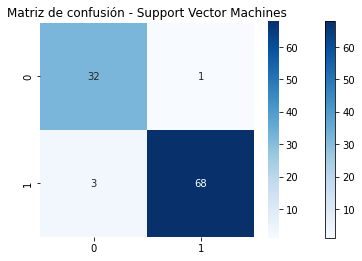

Validación cruzada:
Puntajes: [0.95238095 0.93975904 0.95180723 0.92771084 0.96385542]
Media: 0.947
Desviación estándar: 0.012
Tiempo de entrenamiento: 0.005s

Tiempo de entrenamiento: 0.00 segundos
Modelo: Gaussian Naive Bayes
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.92      0.99      0.95        71

    accuracy                           0.93       104
   macro avg       0.94      0.90      0.92       104
weighted avg       0.93      0.93      0.93       104



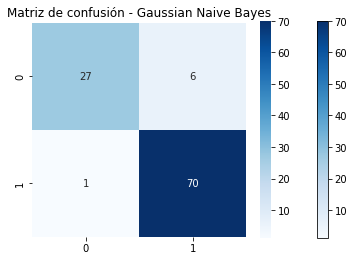

Validación cruzada:
Puntajes: [0.9047619  0.86746988 0.89156627 0.87951807 0.87951807]
Media: 0.885
Desviación estándar: 0.013
Tiempo de entrenamiento: 0.004s

Tiempo de entrenamiento: 0.00 segundos
Modelo: Multinomial Naive Bayes
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.95      0.97      0.96        71

    accuracy                           0.94       104
   macro avg       0.94      0.93      0.93       104
weighted avg       0.94      0.94      0.94       104



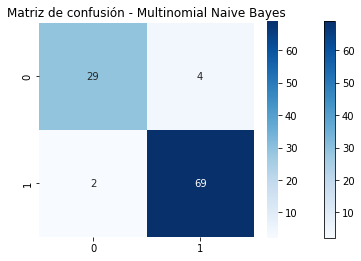

Validación cruzada:
Puntajes: [0.91666667 0.90361446 0.92771084 0.89156627 0.92771084]
Media: 0.913
Desviación estándar: 0.014
Tiempo de entrenamiento: 0.004s

Tiempo de entrenamiento: 0.39 segundos
Modelo: Red Neuronal Artificial
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



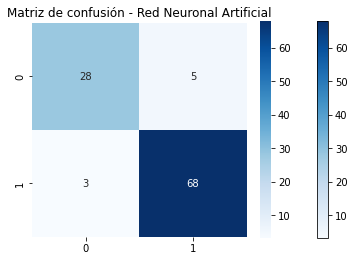

Validación cruzada:
Puntajes: [0.95238095 0.93975904 0.92771084 0.91566265 0.96385542]
Media: 0.940
Desviación estándar: 0.017
Tiempo de entrenamiento: 0.392s

Tiempo de entrenamiento: 0.10 segundos
Modelo: Perceptrón Multicapa
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



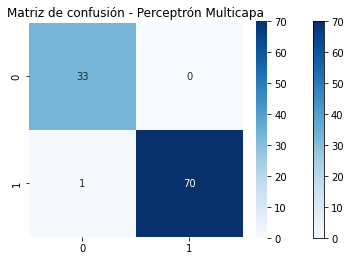

Validación cruzada:
Puntajes: [0.91666667 0.97590361 0.90361446 0.95180723 0.98795181]
Media: 0.947
Desviación estándar: 0.033
Tiempo de entrenamiento: 0.104s

Tiempo de entrenamiento: 0.08 segundos
Modelo: Gradient Boosting
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



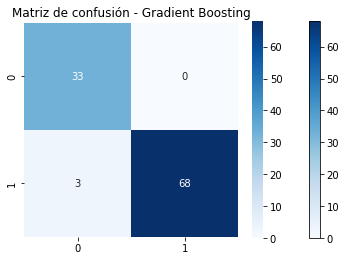

Validación cruzada:
Puntajes: [0.95238095 0.97590361 0.95180723 0.95180723 0.97590361]
Media: 0.962
Desviación estándar: 0.012
Tiempo de entrenamiento: 0.079s

Tiempo de entrenamiento: 0.05 segundos
Modelo: XGBoost
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



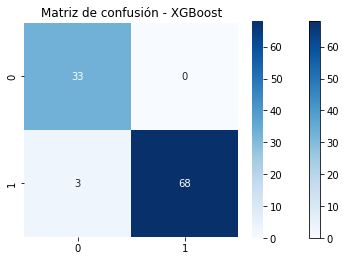

Validación cruzada:
Puntajes: [0.92857143 0.96385542 0.93975904 0.96385542 0.98795181]
Media: 0.957
Desviación estándar: 0.021
Tiempo de entrenamiento: 0.051s

Tiempo de entrenamiento: 1.04 segundos
Modelo: CatBoost
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



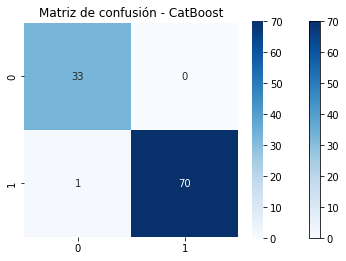

Validación cruzada:
Puntajes: [0.96428571 0.96385542 0.96385542 0.93975904 1.        ]
Media: 0.966
Desviación estándar: 0.019
Tiempo de entrenamiento: 1.036s



In [144]:
resultados = entrenar_evaluar_modelos(X_train, X_test, y_train, y_test)

In [145]:
resultados

{'Regresión Logística': {'modelo': LogisticRegression(),
  'matriz_confusion': array([[28,  5],
         [ 3, 68]]),
  'cross_val_scores': array([0.94047619, 0.91566265, 0.92771084, 0.90361446, 0.91566265]),
  'precision': 0.9315068493150684,
  'recall': 0.9577464788732394,
  'f1': 0.9444444444444444,
  'tiempo_entrenamiento': 0.024333715438842773},
 'K-Vecinos más Cercanos': {'modelo': KNeighborsClassifier(),
  'matriz_confusion': array([[30,  3],
         [ 6, 65]]),
  'cross_val_scores': array([0.89285714, 0.93975904, 0.91566265, 0.92771084, 0.93975904]),
  'precision': 0.9558823529411765,
  'recall': 0.9154929577464789,
  'f1': 0.9352517985611511,
  'tiempo_entrenamiento': 0.0022649765014648438},
 'Árbol de decisión': {'modelo': DecisionTreeClassifier(),
  'matriz_confusion': array([[33,  0],
         [ 5, 66]]),
  'cross_val_scores': array([0.92857143, 0.97590361, 0.98795181, 0.92771084, 0.98795181]),
  'precision': 1.0,
  'recall': 0.9295774647887324,
  'f1': 0.9635036496350364,


In [195]:
def seleccionar_mejor_modelo(resultados, X=X_train):
    precision_dict = {}
    tiempo_entrenamiento_dict = {}
    for name, result in resultados.items():
        precision_dict[name] = result['precision']
        tiempo_entrenamiento_dict[name] = result['tiempo_entrenamiento']
    
    # Seleccionar el modelo con la mayor precisión y menor tiempo de entrenamiento
    mejor_precision = max(precision_dict.values())
    candidatos = [name for name, precision in precision_dict.items() if precision == mejor_precision]
    mejor_tiempo_entrenamiento = min([tiempo_entrenamiento_dict[name] for name in candidatos])
    mejor_modelo = [name for name in candidatos if tiempo_entrenamiento_dict[name] == mejor_tiempo_entrenamiento][0]
    
    print('Mejor modelo:', mejor_modelo)
    print('Precisión en la clase 1:', resultados[mejor_modelo]['precision'])
    print('Tiempo de entrenamiento:', resultados[mejor_modelo]['tiempo_entrenamiento'])

    # Gráfica de precisión de cada modelo
    plt.figure(figsize=(18,5))
    plt.title('Precisión de los modelos')
    plt.ylabel('Precisión')
    plt.xlabel('Modelo')
    sns.barplot(x=list(precision_dict.keys()), y=list(precision_dict.values()))
    plt.show()

    # Matriz de confusión del mejor modelo
    matriz_confusion = resultados[mejor_modelo]['matriz_confusion']
    plt.figure(figsize=(6,6))
    plt.title('Matriz de confusión del mejor modelo')
    sns.heatmap(matriz_confusion, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    # Gráfica de las variables más importantes del mejor modelo
    modelo = resultados[mejor_modelo]['modelo']
    importances = modelo.feature_importances_
    indices = np.argsort(importances)[::-1]
    nombres_variables = list(X.columns)
    nombres_variables_importantes = [nombres_variables[i] for i in indices]
    plt.figure(figsize=(10,5))
    plt.title('Variables más importantes del mejor modelo')
    plt.ylabel('Importancia')
    plt.xlabel('Variables')
    plt.xticks(rotation=90)
    sns.barplot(x=nombres_variables_importantes[:10], y=importances[indices][:10])
    plt.show()
    
    #De los resultados se retorna el mejor modelo
    return mejor_modelo

Mejor modelo: Árbol de decisión
Precisión en la clase 1: 1.0
Tiempo de entrenamiento: 0.002897024154663086


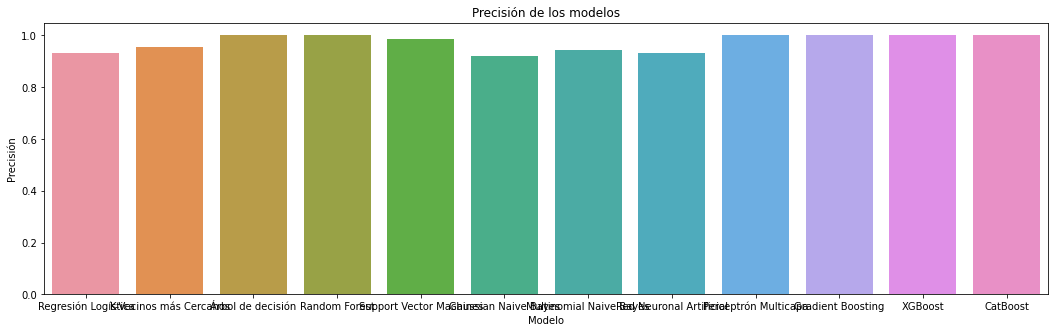

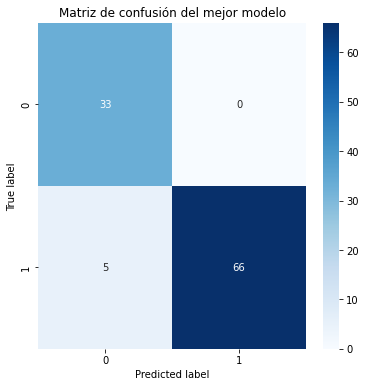

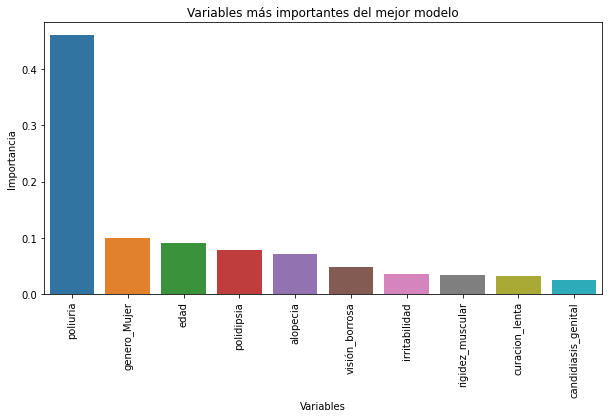

In [196]:
mejor_modelo = seleccionar_mejor_modelo(resultados)

In [212]:
import pickle
#Buscar el mejor modelo dentro del diccionario de resultados y exportarlo
def exportar_mejor_modelo(resultados, mejor_modelo):
    mejor_modelo = resultados[mejor_modelo]['modelo']
    nombre_archivo = './model/mejor_modelo.pkl'
    
    # Exportar modelo en formato pickle
    with open(nombre_archivo, 'wb') as file:
        pickle.dump(mejor_modelo, file)
    
    print(f"El mejor modelo ha sido exportado como '{nombre_archivo}'")

In [213]:
#geramfernandez@gmail.com
exportar_mejor_modelo(resultados, mejor_modelo)

El mejor modelo ha sido exportado como './model/mejor_modelo.pkl'
